In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from mpl_toolkits.mplot3d import Axes3D
import imageio
from IPython.display import Image

In [3]:
# Create a 1D tensor with linearly spaced values from start to end
t0 = 0
t1 = 1
N = 10001
t = torch.linspace(t0, t1, N).reshape(-1,1).to(device)

In [4]:
# Create a 1D tensor with linearly spaced values from start to end
s0 = 0
s1 = 1
N = 10001
s = torch.linspace(s0, s1, N).reshape(-1,1).to(device)

In [9]:
# First Boundary
Pi = torch.pi
Xb1 = torch.ones_like(t).to(device)
Yb1 = torch.sin(2*Pi*t).to(device)
Zb1 = torch.cos(2*Pi*t).to(device) 

# Second Boundary
Xb2 = -torch.ones_like(t).to(device)
Yb2 = torch.sin(2*Pi*t).to(device)
Zb2 = torch.cos(2*Pi*t).to(device) 

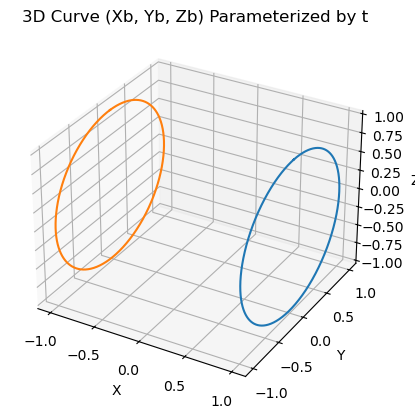

C:\Users\yaman\AppData\Local\Temp\ipykernel_25844\941363016.py:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


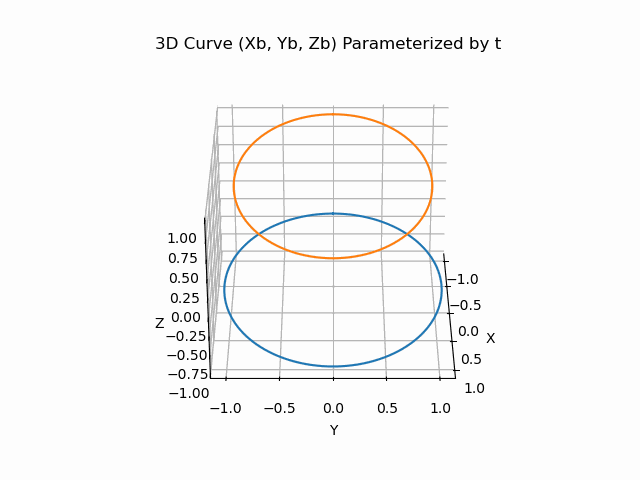

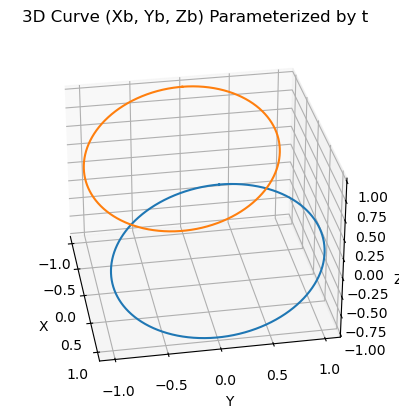

In [10]:
# Convert tensors to numpy arrays for plotting
Xb1_np = Xb1.detach().cpu().numpy()
Yb1_np = Yb1.detach().cpu().numpy()
Zb1_np = Zb1.detach().cpu().numpy()

Xb2_np = Xb2.detach().cpu().numpy()
Yb2_np = Yb2.detach().cpu().numpy()
Zb2_np = Zb2.detach().cpu().numpy()
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D curve
ax.plot(Xb1_np, Yb1_np, Zb1_np)
ax.plot(Xb2_np, Yb2_np, Zb2_np)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Curve (Xb, Yb, Zb) Parameterized by t')

# Show the plot
plt.show()

# Create a 3D plot and save frames for the GIF
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D curve
ax.plot(Xb1_np, Yb1_np, Zb1_np)
ax.plot(Xb2_np, Yb2_np, Zb2_np)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Curve (Xb, Yb, Zb) Parameterized by t')

# Save frames for the GIF
filenames = []
for angle in range(0, 360, 10):
    ax.view_init(30, angle)
    filename = f'frame_{angle}.png'
    plt.savefig(filename)
    filenames.append(filename)

# Create a GIF
with imageio.get_writer('rotation.gif', mode='I', loop=0, duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove the individual frames
import os
for filename in filenames:
    os.remove(filename)

# Display the GIF in the notebook
Image(filename='rotation.gif')

In [11]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(2, 20)  # First hidden layer with 10 nodes
        self.fc2 = nn.Linear(20, 20) # Second hidden layer with 10 nodes
        self.fc3 = nn.Linear(20, 3)  # Output layer with 2 nodes

    def forward(self, x):
        # Apply ReLU activation function after each hidden layer
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)  # No activation function on the output layer
# Correctly update the second output without in-place operation
        return x

# Create an instance of the neural network
model = SimpleNN().to(device)

# Print the model architecture
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=3, bias=True)
)


In [13]:
range_min, range_max = -1, 1
num_points = 101

# Create 1D tensors for x and y coordinates
u = torch.linspace(range_min, range_max, num_points).to(device)
v = torch.linspace(range_min, range_max, num_points).to(device)
du = u[1]-u[0]
dv = v[1]-v[0]

# Create a grid of points
uu, vv = torch.meshgrid(u, v, indexing='ij')

# Stack the grid points into a 2D tensor
grid_points = torch.stack((uu, vv), dim=-1)

# Print the shape and the tensor
#print(grid_points.shape)  # Should be (num_points, num_points, 2)
#print(grid_points)
uv_square = grid_points.reshape(-1,2)


# Calculate the distance of each point from the origin
distances = torch.sqrt(uv_square[:, 0]**2 + uv_square[:, 1]**2)

# Filter out the points that lie inside the annulus with inner radius 0.2 and outer radius 1.0
inside_annulus = (distances >= 0.2) & (distances <= 1.0)
uv_annulus = uv_square[inside_annulus]

# Print the filtered coordinates tensor
print(uv_annulus)

tensor([[-1.0000,  0.0000],
        [-0.9800, -0.1800],
        [-0.9800, -0.1600],
        ...,
        [ 0.9800,  0.1600],
        [ 0.9800,  0.1800],
        [ 1.0000,  0.0000]], device='cuda:0')


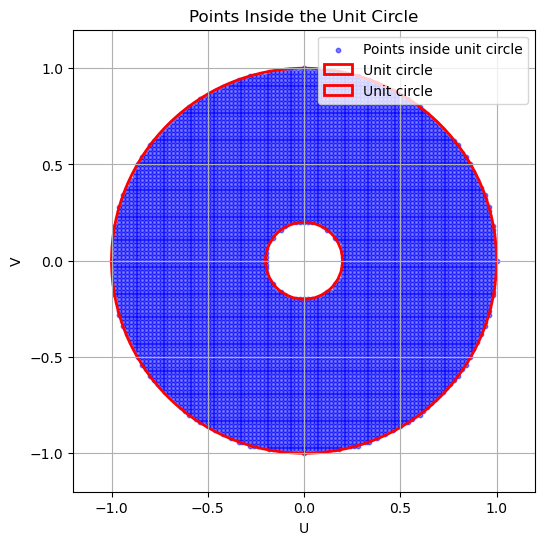

In [15]:
# Move the filtered points back to the CPU for plotting
uv_circle_cpu = uv_annulus.cpu()

# Extract x and y coordinates
x_circle = uv_circle_cpu[:, 0].numpy()
y_circle = uv_circle_cpu[:, 1].numpy()

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x_circle, y_circle, s=10, c='blue', alpha=0.5, label='Points inside unit circle')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='red', fill=False, linewidth=2, label='Unit circle')
plt.gca().add_patch(circle)

# Plot the unit circle
circle = plt.Circle((0, 0), 0.2, color='red', fill=False, linewidth=2, label='Unit circle')
plt.gca().add_patch(circle)

# Set labels and title
plt.xlabel('U')
plt.ylabel('V')
plt.title('Points Inside the Unit Circle')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# First Boundary term
# Generate random angles uniformly between 0 and 2*pi
num_points_circumference = 10001
angles = 2 * torch.pi * torch.linspace(0,1,num_points_circumference)

# Convert polar coordinates to Cartesian coordinates
u_boundary1 = torch.cos(angles).to(device)
v_boundary1 = torch.sin(angles).to(device)

# Stack the coordinates into a single tensor
uv_boundary1 = torch.stack((u_boundary1, v_boundary1), dim=1).to(device)

# Second Boundary Term
# Convert polar coordinates to Cartesian coordinates
u_boundary2 = 0.2*torch.cos(angles).to(device)
v_boundary2 = 0.2*torch.sin(angles).to(device)

# Stack the coordinates into a single tensor
uv_boundary2 = torch.stack((u_boundary2, v_boundary2), dim=1).to(device)

In [ ]:
def Loss_Bulk(model,input_points):
    flat_grid_points = input_points.reshape(-1, 2).requires_grad_(True)  # Enable gradient tracking
    surface_points = model(flat_grid_points)  # Shape: (num_points*num_points, 3)
    
    # Initialize a list to store Jacobian components for each output dimension
    jacobian2 = []

    #X_surface = surface_points[:,0]
    #Y_surface = surface_points[:,1]
    #Z_surface = surface_points[:,2]
    X_surface = surface_points[:,0]
    Y_surface = surface_points[:,1]
    Z_surface = surface_points[:,2]

    # Loop over each of the 3 output dimensions
    # Create grad_outputs with 1s in the i-th component and 0s elsewhere
    for R in [X_surface,Y_surface,Z_surface]:
        grad_outputs = torch.ones_like(R)

        # Compute gradient for the i-th output component
        (grad,) = torch.autograd.grad(
            outputs=R,
            inputs=flat_grid_points,
            grad_outputs=grad_outputs,
            create_graph=True,
            retain_graph=True  # Retain graph for multiple backward passes
        )

        jacobian2.append(grad)

    # Stack the results along the second dimension to get shape (num_points^2, 3, 2)
    jacobian2 = torch.stack(jacobian2, dim=1)
    ru = jacobian2[:,:,0]
    rv = jacobian2[:,:,1]
    A_vec = torch.cross(ru,rv,dim=1)
    A = A_vec.norm(dim=1)
    A_total = (torch.sum(A))*du*dv
    return A_total

In [ ]:
def Loss_Boundary(model,uv_boundary1,uv_boundary2,Xb1,Yb1,Zb1,Xb2,Yb2,Zb2):
    XYZ_boundary1 = model(uv_boundary1)
    Xb1_pred = XYZ_boundary1[:,0]
    Yb1_pred = XYZ_boundary1[:,1]
    Zb1_pred = XYZ_boundary1[:,2]

    XYZ_boundary2 = model(uv_boundary2)
    Xb2_pred = XYZ_boundary2[:,0]
    Yb2_pred = XYZ_boundary2[:,1]
    Zb2_pred = XYZ_boundary2[:,2]

    boundary_loss = torch.sum((Xb1_pred-Xb1.reshape(-1))**2 + (Yb1_pred-Yb1.reshape(-1))**2 + (Zb1_pred-Zb1.reshape(-1))**2) + torch.sum((Xb2_pred-Xb2.reshape(-1))**2 + (Yb2_pred-Yb2.reshape(-1))**2 + (Zb2_pred-Zb2.reshape(-1))**2)
    return boundary_loss  

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)